#### For this project I have taken the dataset from Kaggle. I dowloaded all the CSV files. I will try to analyze each of the CSV files first. After understanding and analyzing the data will decide what will be the target output for this Dataset ####

*** Import all the important modules ***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*** Read the data from the CSV files and store in the Dataframe ***

In [5]:
features_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\features.csv')
stores_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\stores.csv')
train_data_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\train.csv')
test_data_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\test.csv')
sample_submission_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\sampleSubmission.csv')

*** Lets do initial analysis on all these data ***

In [6]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
features_df.shape

(8190, 12)

This CSV file has Store information. There are close to 8000 rows and 11 features for the store.

In [8]:
features_df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

There are information for 45 Walmart store 

In [9]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [10]:
features_df['Store'].value_counts().head()

43    182
41    182
33    182
29    182
25    182
Name: Store, dtype: int64

We see that each stores have 182 sample records 

Lets see if each stores have same span of date range.

In [11]:
features_df.groupby('Store')['Date'].agg({'MinDate':'min','Maxdate':'max'}).head()

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,MinDate,Maxdate
Store,,
1,2010-02-05,2013-07-26
2,2010-02-05,2013-07-26
3,2010-02-05,2013-07-26
4,2010-02-05,2013-07-26
5,2010-02-05,2013-07-26


We can see for each store there is same date range. The range is between 2/5/2010 to 7/26/2013

In [12]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Store CSV file contains 2 more features for each store, type & size

Lets join stores and features data frames to bring all the features of the store in 1 place

In [18]:
df = pd.merge(features_df,stores_df,on='Store',how='inner')
df = df.fillna(0)

In [19]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [20]:
train_data_df.shape

(421570, 5)

There are almost 420K training data

In [21]:
final_features = df

Now lets analyze the training data

In [71]:
df = train_data_df['Store'].value_counts().reset_index()
df.sort_values(by='index')

,index,Store
3,1,10244
4,2,10238
34,3,9036
2,4,10272
35,5,8999
9,6,10211
26,7,9762
20,8,9895
36,9,8867
1,10,10315


So each store have close to 6000 to 10000 data in the training dataset 

In [72]:
train_data_df.groupby('Store')['Dept'].nunique()

Store
1     77
2     78
3     72
4     78
5     72
6     77
7     76
8     76
9     73
10    77
11    78
12    75
13    79
14    77
15    79
16    76
17    76
18    78
19    79
20    78
21    77
22    76
23    77
24    77
25    77
26    76
27    78
28    77
29    77
30    64
31    76
32    77
33    63
34    78
35    74
36    63
37    62
38    63
39    75
40    77
41    77
42    62
43    61
44    62
45    74
Name: Dept, dtype: int64

We can see in the training data we have for each walmart store on an average 77 different departments

In [22]:
final_df = pd.merge(train_data_df,final_features,on=('Store','Date'),how='inner')

In [23]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315


Now we created final dataframe with all the features and targets. We can now analyze on this. We will try to find what all the important features are there on which target - weekly sales are affecting the most.

In [78]:
a = final_df.groupby('Dept')['Weekly_Sales'].mean().reset_index()
b= a.sort_values(by='Weekly_Sales',ascending=False)

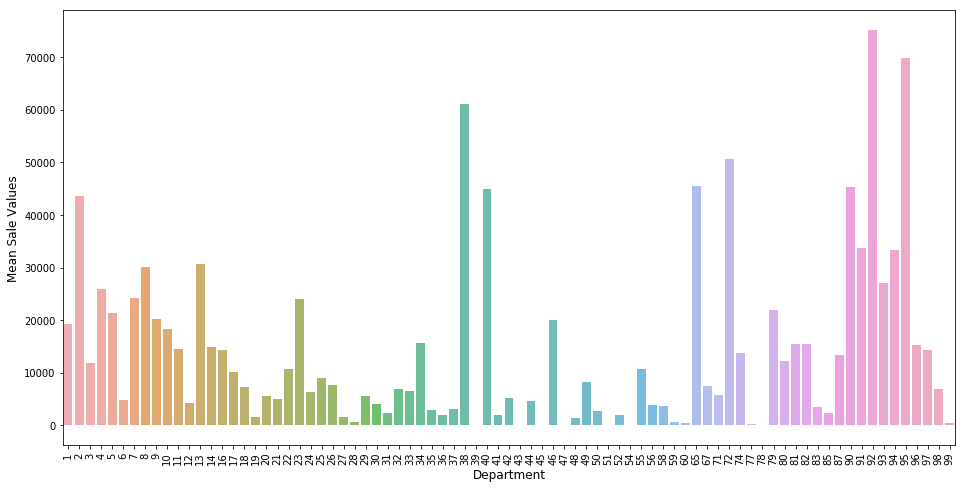

In [79]:
plt.figure(figsize = (16,8))
sns.barplot(b['Dept'], b['Weekly_Sales'], alpha=0.8)
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

We see that Mean sales value varies a lot with different Department. Department near 90s are generally high. 

In [80]:
a = final_df.groupby('IsHoliday_x')['Weekly_Sales'].mean().reset_index()
a

,IsHoliday_x,Weekly_Sales
0,False,15901.445069
1,True,17035.823187


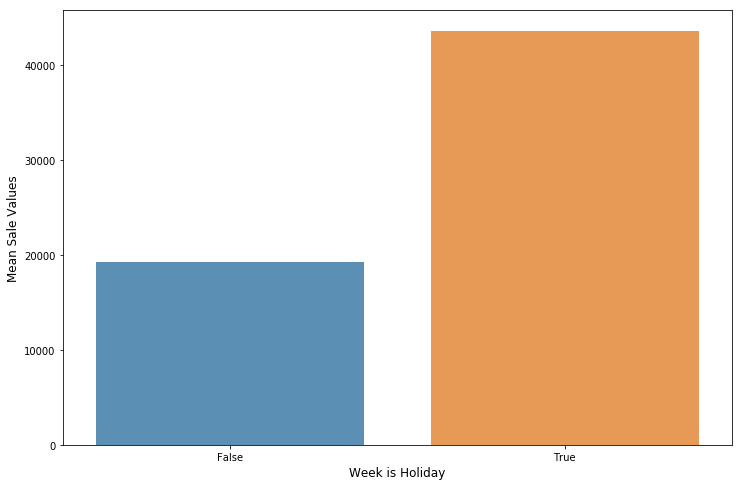

In [81]:
plt.figure(figsize = (12,8))
sns.barplot(a['IsHoliday_x'], b['Weekly_Sales'], alpha=0.8)
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Week is Holiday', fontsize=12)
#plt.legend()
plt.show()

Clearly we see the sales value are high accross all Walmart on the holiday weeks.

In [24]:
a = final_df.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
store_weekly_sales_df = pd.merge(a,final_features,on=('Store','Date'),how='inner')
store_weekly_sales_df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [25]:
df = store_weekly_sales_df[['Size','Temperature','Fuel_Price','Weekly_Sales']]


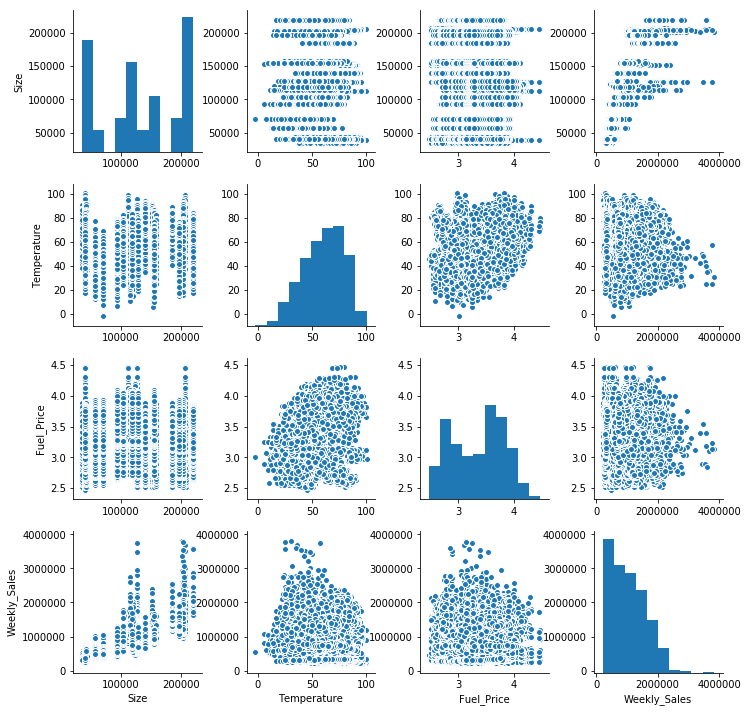

In [26]:
plt.figure(figsize = (16,8))
sns.pairplot(df)
plt.show()

We just took 3 features, store size, temperature & fuel prize and 1 target weekly sales and try to setup some relationship between them. We see that store size definetly impact weekly sales. Temperature & Fuel prize does little impact on the weekly sales.